# Importing the required libraries

In [14]:
pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for joblib from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/a8/01/18232f93672c1d530834e2e0568a80eaab1df12d67ae499b1762ab462b5c/regex-2023.12.25-cp311-cp311-win_amd64.whl.metadata
  Using cached regex-2023.12.25-cp311-cp311-win_amd64.whl.metadata (41 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Definition of Functions 

In [33]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message
    

In [34]:
data=[]
conversation='chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# analyse the sentiments

In [35]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_20204\1528190754.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\admin\AppData\Local\Temp\ipykernel_20204\1528190754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
C:\Users\admin\AppData\Local\Temp\ipykernel_20204\1528190754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Date,Time,contact,Message,positive,negative,neutral
1,2023-12-21,13:31,+91 99246 12963,There is no session today,0.0,0.355,0.645
2,2023-12-21,13:38,Adnaan Mansuri,Okay,1.0,0.000,0.000
3,2024-01-04,13:26,+91 99246 12963,There is no session today,0.0,0.355,0.645
4,2024-01-04,13:27,Adnaan Mansuri,Okay,1.0,0.000,0.000
5,2024-01-06,15:04,+91 99246 12963,Where are you,0.0,0.000,1.000


In [36]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [37]:
df.contact.unique()

array([None, '+91 99246 12963', 'Adnaan Mansuri'], dtype=object)

In [38]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [48]:
import emoji
import regex


In [51]:
import regex
import emoji

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if emoji.emoji_count(word) > 0:  # Check if an emoji
            emoji_list.append(word)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)


,Date,Time,contact,Message,emoji
0,2023-12-21,13:31 -,None,,[]
1,2023-12-21,13:31,+91 99246 12963,There is no session today,[]
2,2023-12-21,13:38,Adnaan Mansuri,Okay,[]
3,2024-01-04,13:26,+91 99246 12963,There is no session today,[]
4,2024-01-04,13:27,Adnaan Mansuri,Okay,[]
5,2024-01-06,15:04,+91 99246 12963,Where are you,[]
6,2024-01-06,15:08,Adnaan Mansuri,I'll see the video.,[]
7,2024-01-06,15:10,+91 99246 12963,ok we will continue from tuesday,[]
8,2024-01-06,15:10,+91 99246 12963,update vin grpp,[]
9,2024-01-06,15:10,Adnaan Mansuri,Ok,[]


In [52]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 1082 words in all the messages.


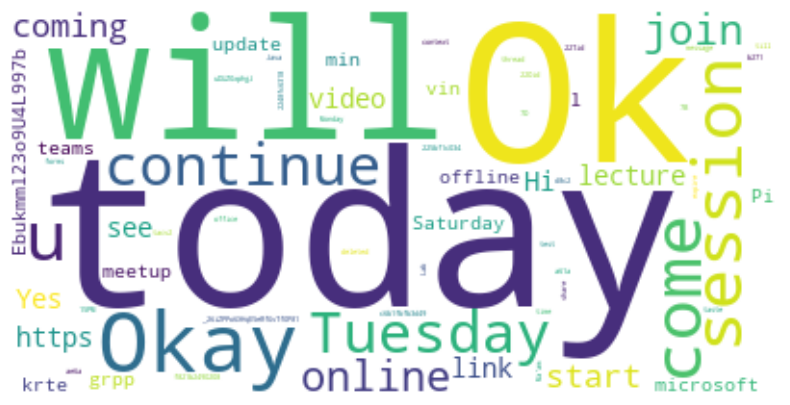

In [53]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()